Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

Data Loading

In [2]:
data = pd.read_csv('Walmart.csv')

Exploratory Data Analysis

In [3]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
data.shape

(6435, 8)

Problem Statement
1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

In [5]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

As the date column is of string type, it needs to be converted into datetime and we will extract year,month and week
separately as we need to forecast weekly sales.

We split the date parameter into year parameter as in date inputs all the year will be same  which leads to overfitting and 
will cause the model to become complacent.
To increase the variability between different various inputs dates,months and weeks were labeled separately.  

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.week
data['DayOfTheWeek'] = data['Date'].dt.dayofweek
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [9]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  DayOfTheWeek  Day  
0  211.096358         8.106  2010      5    17             6    2  
1  211.242170         8.106  2010     12    48             3    2  
2  211.289143         8.106  2010      2     7             4   19  
3  211.319643         8.106  2010      2     8             4   26  
4  211.350143         8.106  2010      5    18             0    3

In [10]:
print(data['Weekly_Sales'].max())


3818686.45


In [11]:
dataset_xg = data

As maximum weekly sales happened on 51 week means this is the Christmas holiday week, so holiday have an impact on the sales.

In [12]:
data.loc[data['Weekly_Sales'] ==3818686.45]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14 2010-12-24    3818686.45             0        30.59       3.141   

            CPI  Unemployment  Year  Month  Week  DayOfTheWeek  Day  
1905  182.54459         8.724  2010     12    51             4   24

In [13]:
print(data['Weekly_Sales'].mean())


1046964.8775617732


In [14]:
print(data['Date'].min())

2010-01-10 00:00:00


In [15]:
print(data['Date'].max())

2012-12-10 00:00:00


Understanding how many unique stores are present in the region

In [16]:
print(data['Store'].nunique())

45


In [17]:
print(data['Year'].unique())

[2010 2011 2012]


Checking for outliers

Store              AxesSubplot(0.125,0.657941;0.133621x0.222059)
Weekly_Sales    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Temperature      AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Fuel_Price      AxesSubplot(0.606034,0.657941;0.133621x0.222059)
CPI             AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Unemployment       AxesSubplot(0.125,0.391471;0.133621x0.222059)
dtype: object

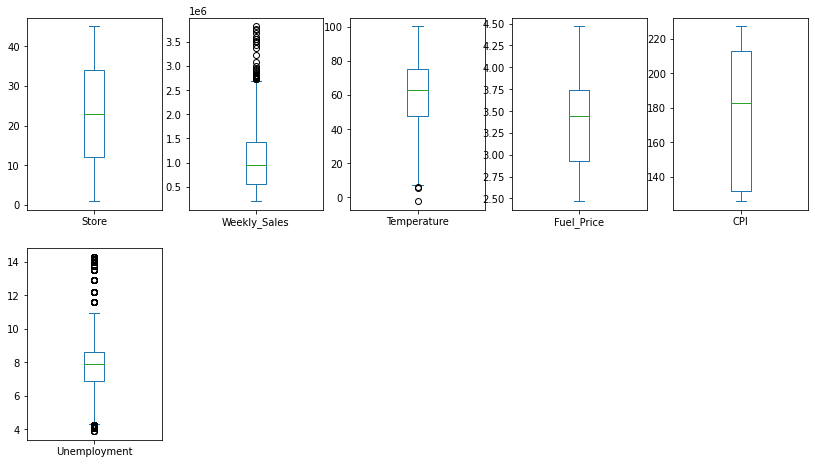

In [18]:
data[['Store', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']].plot(kind='box',subplots=1,layout=(3,5),figsize=(14,12))

Plotting scatter plot to get an idea of spread of the data across different features with weekly sales.

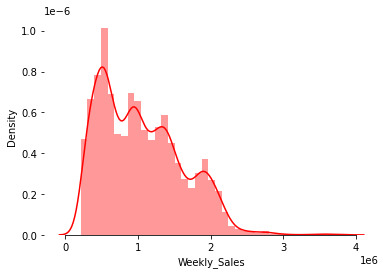

In [19]:
sns.distplot(data["Weekly_Sales"], color='red')
sns.despine(trim=True, left=True)

In [20]:
data["Weekly_Sales"].skew()

0.6683617974864524

In [21]:
def scatter(data,column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

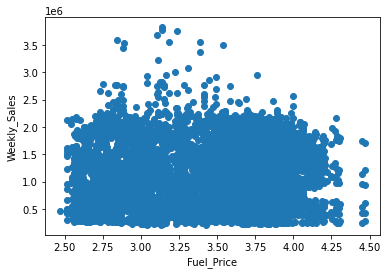

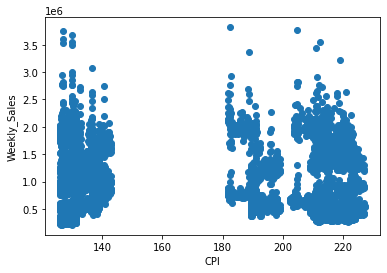

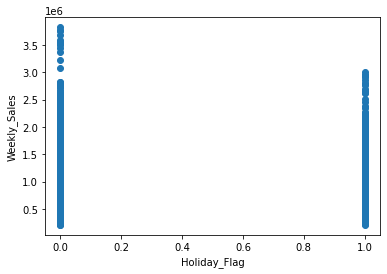

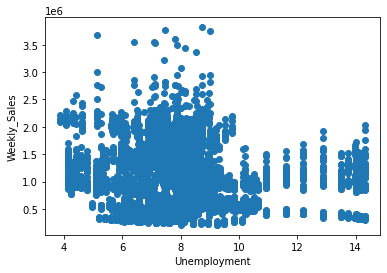

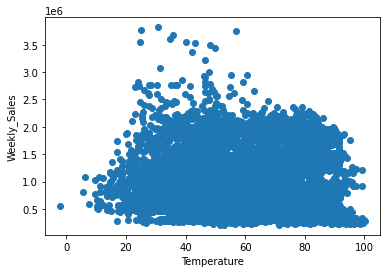

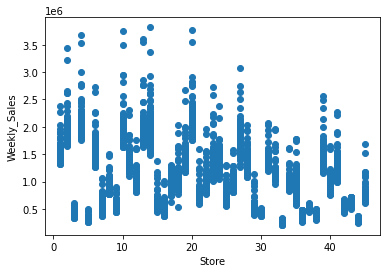

In [22]:
scatter(data, 'Fuel_Price')
scatter(data, 'CPI')
scatter(data, 'Holiday_Flag')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')


Assumptions
1. All the stores are of same type and size.
2. There are no departments in the store. A store is an one entity.

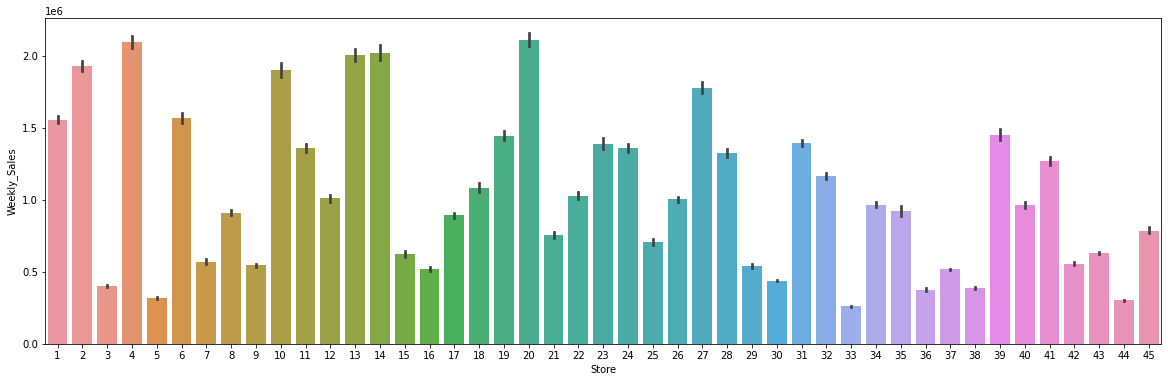

In [23]:
plt.subplots(figsize=(20, 6))
fig = sns.barplot(x='Store', y="Weekly_Sales", data=data)

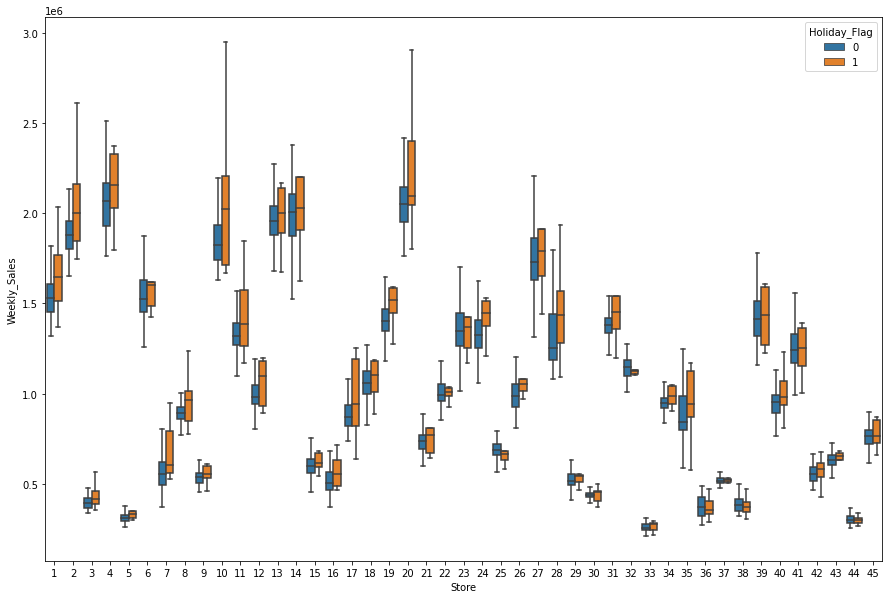

In [24]:
plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="Holiday_Flag")

As seen from the above boxplot the holiday sales for store 10 is highest.

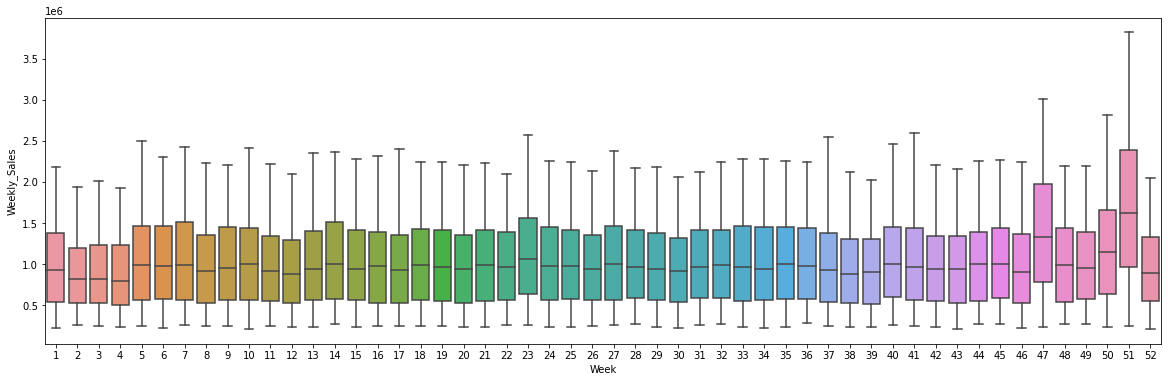

In [25]:
plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)

Weekly sales is maximum on Christmas eve week.

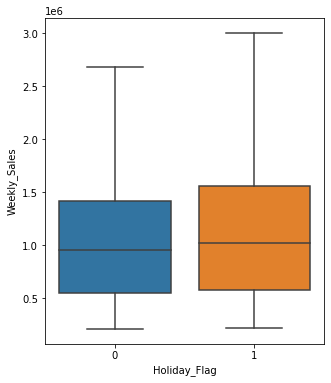

In [26]:
plt.subplots(figsize=(5, 6))
fig = sns.boxplot(x='Holiday_Flag', y="Weekly_Sales", data=data, showfliers=False)

In [27]:
print(data[data['Holiday_Flag']==1 ]['Weekly_Sales'].describe().round(1))
print(data[data['Holiday_Flag']==0]['Weekly_Sales'].describe().round(1))

count        450.0
mean     1122887.9
std       627684.9
min       215359.2
25%       575865.5
50%      1018538.0
75%      1555213.2
max      3004702.3
Name: Weekly_Sales, dtype: float64
count       5985.0
mean     1041256.4
std       558957.4
min       209986.2
25%       551378.4
50%       956211.2
75%      1414343.5
max      3818686.4
Name: Weekly_Sales, dtype: float64


In [28]:
data.groupby('Store')['Weekly_Sales'].sum()[:10].sort_values(ascending=False)

Store
4     2.995440e+08
2     2.753824e+08
10    2.716177e+08
6     2.237561e+08
1     2.224028e+08
8     1.299512e+08
7     8.159828e+07
9     7.778922e+07
3     5.758674e+07
5     4.547569e+07
Name: Weekly_Sales, dtype: float64

To forecast we can use time series modeling and regressive ML models.

In [29]:
import plotly.express as px

In [30]:
df_weeks = data.groupby('Week').sum()

In [31]:

px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', 
        labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, 
        title = 'Sales over weeks')

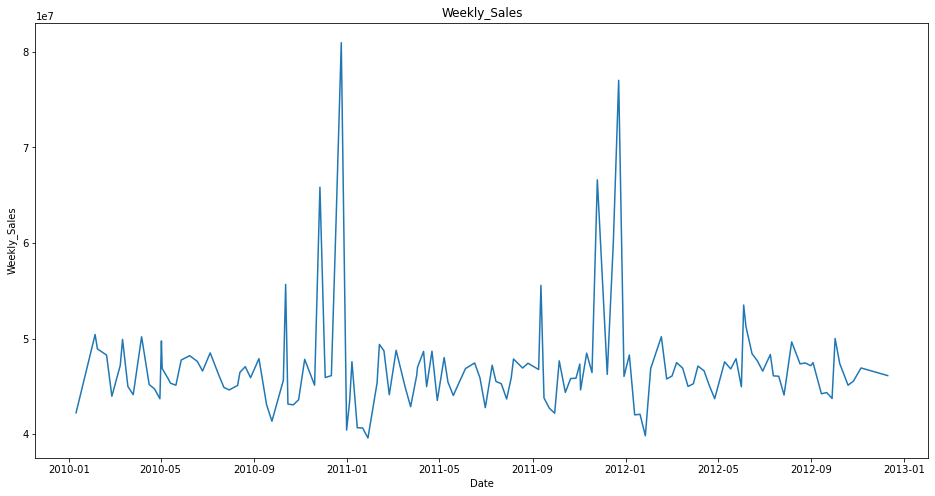

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
time_s=data.groupby(["Date"])["Weekly_Sales"].sum()
time_s.astype('float')
plt.figure(figsize=(16,8))
plt.title('Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.plot(time_s);

1.Seasonality - High-Point: It seems there are some seasonality to our data, where the end of December seems like a popular time to buy specific products from the company. My assumptions is that this has to do with the holidays and people buy gifts for each other, which makes sense.
2.Seasonality - Low-Point: Around the end of january it seems to be a pretty steep dip in the different stores sales both during 2011 and 2012.

In [33]:
time_s.head()

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
Name: Weekly_Sales, dtype: float64

As seen from the above visualization it looks like there is no trend in this.

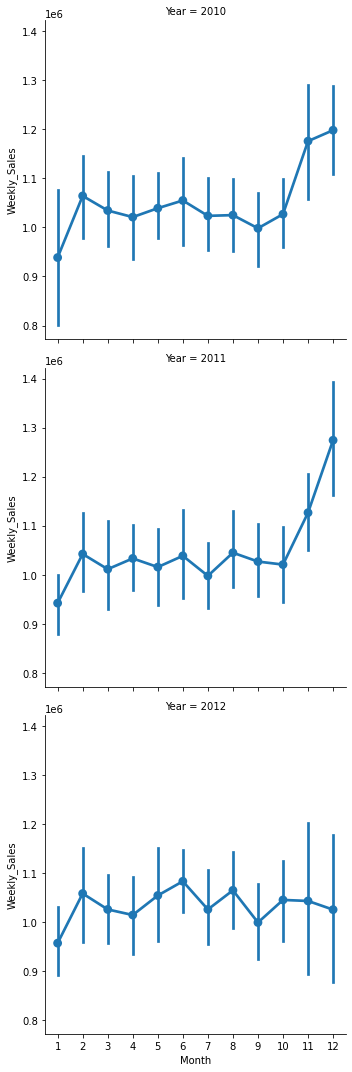

In [34]:
#Copy dataset and then Use date as set index and  plot line chart.
# Sales trend over the months and year
sns.factorplot(data = data, x ="Month", y = "Weekly_Sales", 
            # per store type in cols
               row = "Year")

In [35]:
 data1 = data.copy() 

In [36]:
data1.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  DayOfTheWeek  Day  
0  211.096358         8.106  2010      5    17             6    2  
1  211.242170         8.106  2010     12    48             3    2  
2  211.289143         8.106  2010      2     7             4   19  
3  211.319643         8.106  2010      2     8             4   26  
4  211.350143         8.106  2010      5    18             0    3

In [37]:
 data1 = data1.groupby('Date')['Weekly_Sales'].sum().reset_index()  

In [38]:
data1 = data1.set_index('Date')

In [39]:
data1.head()

Weekly_Sales
Date                    
2010-01-10   42239875.87
2010-02-04   50423831.26
2010-02-07   48917484.50
2010-02-19   48276993.78
2010-02-26   43968571.13

In [40]:
data1.tail()

Weekly_Sales
Date                    
2012-10-08   47403451.04
2012-10-19   45122410.57
2012-10-26   45544116.29
2012-11-05   46925878.99
2012-12-10   46128514.25

In [41]:
#x = data1['Date']
#y = data1['Weekly_Sales']
#plt.plot(x,y)
#plt.xlabel('Date')
#plt.ylabel("Weekly_Sales")
#plt.xticks(rotation = 90)
#plt.show()

In [42]:
df_Store = data.groupby('Store')['Weekly_Sales'].sum().sort_values()
print(df_Store)


Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


Mean Sales comparision across different stores

In [43]:
weekly_sales = data.groupby(['Year','Week'], as_index = False).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = data.loc[data['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = data.loc[data['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = data.loc[data['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

In [44]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter( x = weekly_sales2010['Weekly_Sales']['mean'].index, y = weekly_sales2010['Weekly_Sales']['mean'], name = 'Mean Sales 2010', mode = 'lines') )
fig.add_trace(go.Scatter( x = weekly_sales2011['Weekly_Sales']['mean'].index, y = weekly_sales2011['Weekly_Sales']['mean'], name = 'Mean Sales 2011', mode = 'lines') )
fig.add_trace(go.Scatter( x = weekly_sales2012['Weekly_Sales']['mean'].index, y = weekly_sales2012['Weekly_Sales']['mean'], name = 'Mean Sales 2012', mode = 'lines') )
fig.update_layout(title = 'Sales 2010, 2011, 2012', xaxis_title = 'Weeks')

The above plot makes the right skewness clear, so most weeks have sales around the median. 
Also, we can see that the Weekly_Sales attribute has a large kurtosis which indicates the presence of extreme values, 
in other words, some weeks have high sales. It would be a good idea to know the origins of these extreme values.

<AxesSubplot:>

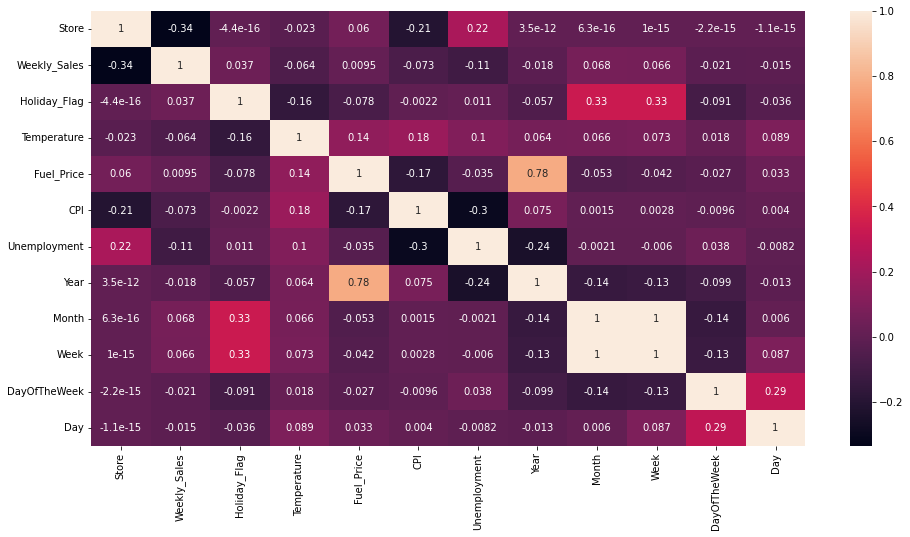

In [45]:
plt.figure(figsize=(16,8))
corr = data.corr()
# create a heatmap with seaborn and the correlation matrix
sns.heatmap(corr, annot=True)

As seen there is no trend and there is seasonality. In order to use time series model we need to ensure our time series data 
is stationary. We will carry out two tests to conclude if dataset is stationary or not.

Rolling mean 

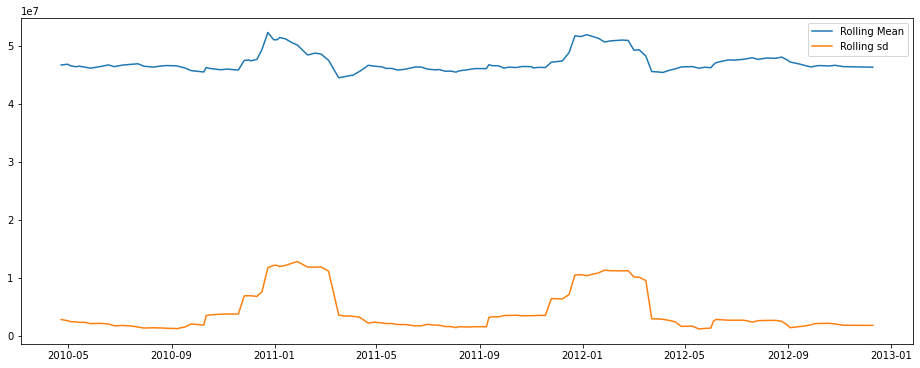

In [46]:
plt.figure(figsize=(16,6))
plt.plot(time_s.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(time_s.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend()

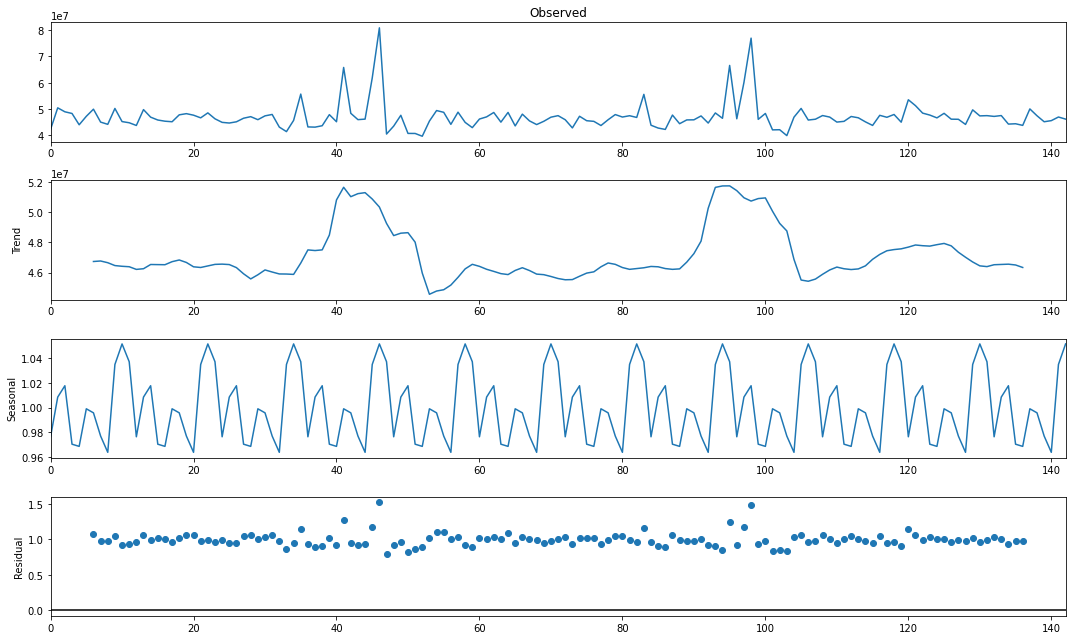

In [47]:
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (15,9)
# multiplicative
res = sm.tsa.seasonal_decompose(time_s.values,period=12,model="multiplicative")
fig = res.plot()

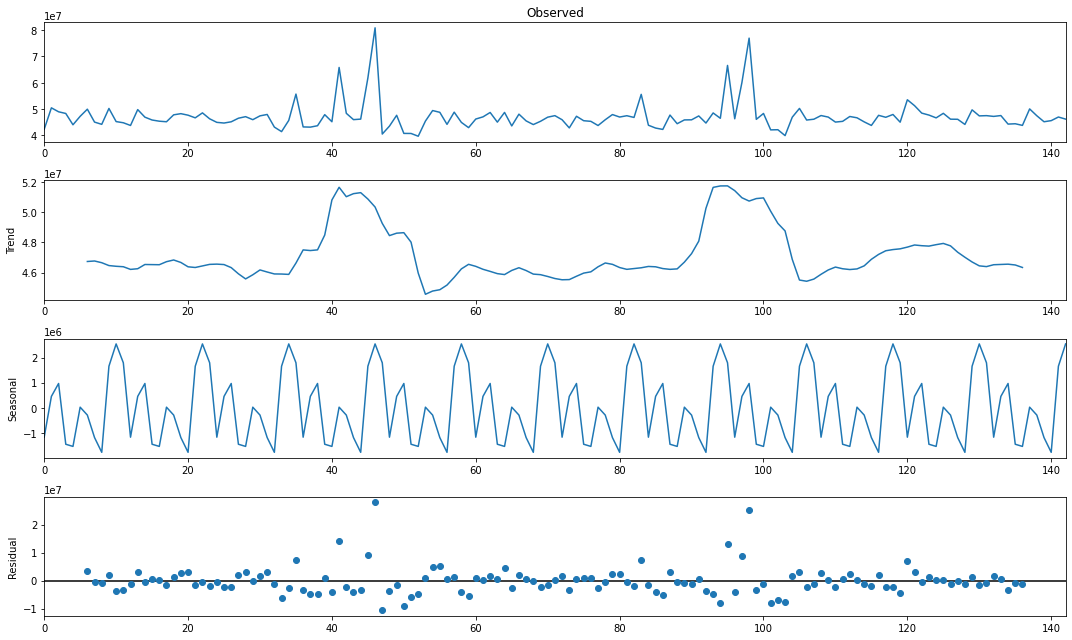

In [48]:
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (15,9)
# additive
res = sm.tsa.seasonal_decompose(time_s.values,period=12,model="additive")
fig = res.plot()

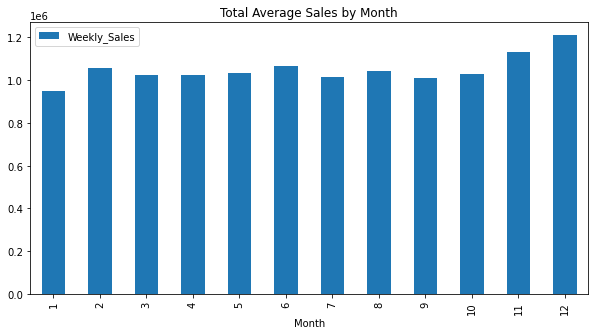

In [49]:
#Average Sales over the months for all stores.
month_grouped = data.groupby('Month')['Weekly_Sales'].mean().T
# grouped_monthly
month_grouped.plot(kind='bar',title='Total Average Sales by Month',figsize=(10,5))
plt.legend(loc='best')
plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
result = adfuller(data['Weekly_Sales'],autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)


Results of Dickey-Fuller Test:
ADF Statistic: -4.624149
p-value: 0.000117
Critical Values:
1% -3.4313721757424656
5% -2.8619917128968813
10% -2.5670104435791017


ARIMA Modeling

In [51]:
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score



In [52]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [53]:
warnings.filterwarnings('ignore') 
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(time_s,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5424.7871794794755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4882.833488239872
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4509.049045897482
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4089.897941540664
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4543.066324442393
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4510.912964178737
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4102.320621290806
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4076.3368508115764
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5290.960410872043
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4821.0076272407605
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4470.405793548989
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4039.982067832913
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4880.624061865666
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4807.935032636489
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4103.468065133093
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4035.4014363513197
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4843.92831136518
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4443.4995459963175
ARIMA(

In [54]:
mod = sm.tsa.statespace.SARIMAX(time_s,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
warnings.filterwarnings('ignore') 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.148      0.565      0.572      -0.206       0.373
ma.L1         -0.7396      0.115     -6.451      0.000      -0.964      -0.515
ar.S.L12      -0.1529      0.192     -0.797      0.426      -0.529       0.223
ma.S.L12      -0.4969      0.144     -3.451      0.001      -0.779      -0.215
sigma2        7.8e+13    1.4e-15   5.59e+28      0.000     7.8e+13     7.8e+13


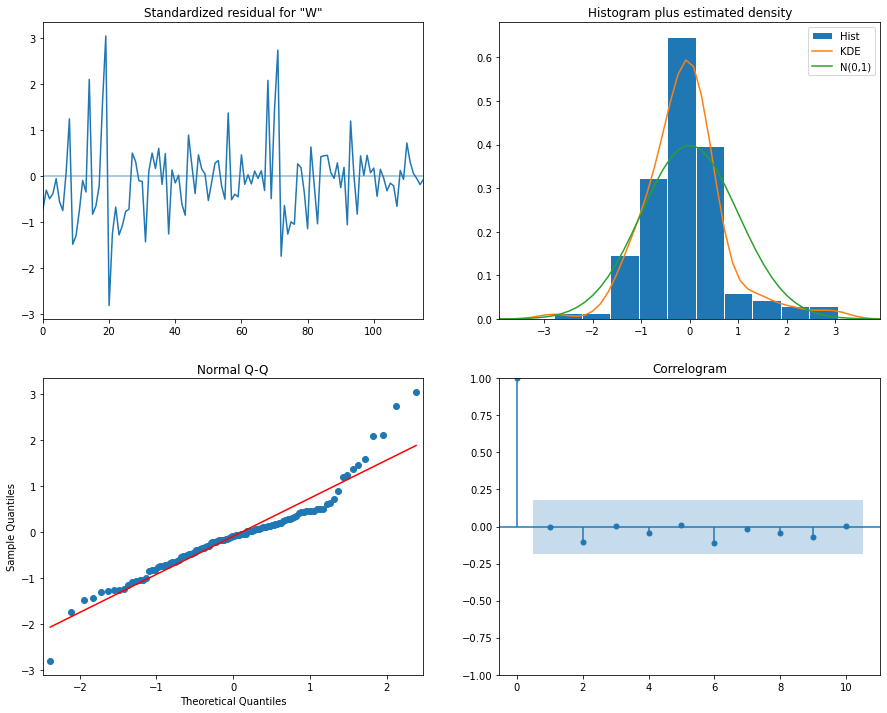

In [55]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [56]:
pred = results.get_prediction(start=pd.to_datetime('2011-01-14'), dynamic=False)
pred_ci = pred.conf_int()

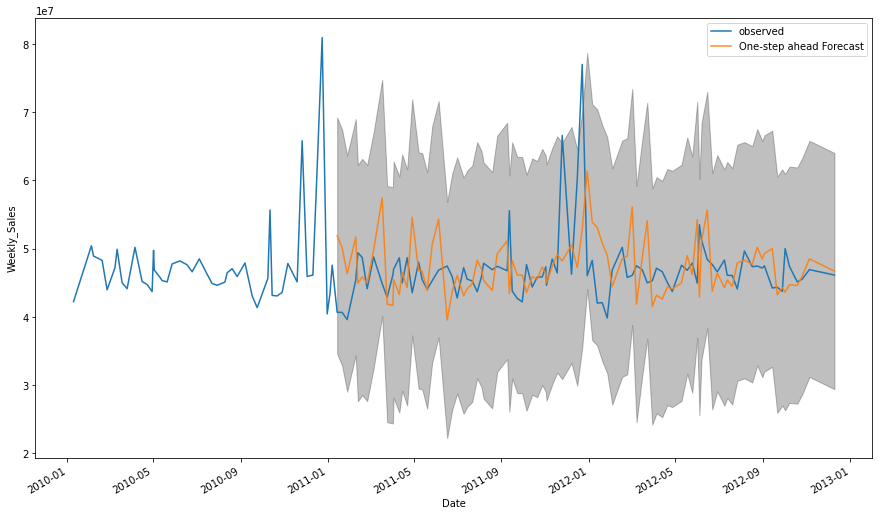

In [57]:
ax = time_s['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly_Sales')
plt.legend()

plt.show()

In [58]:
y_forecasted = pred.predicted_mean
y_truth = time_s['2011-01-14':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 37782540903382.02


With dynamic forecasting

In [59]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2011-01-14'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

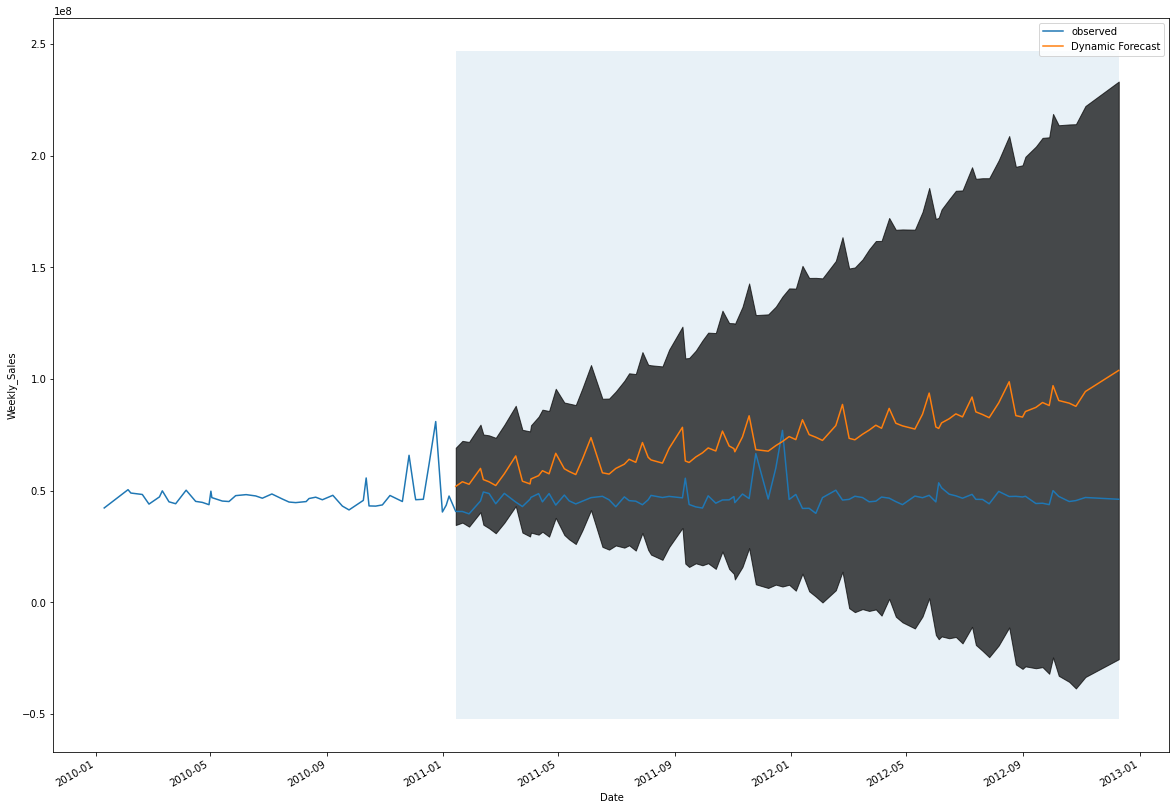

In [60]:
ax = time_s['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.7)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-01-14'), time_s.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly_Sales')

plt.legend()
plt.show()

In [61]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = time_s['2011-01-14':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 846475249197734.2


Time series modeling for Store10 

In [62]:
store_data = data.groupby(['Date','Store'])['Weekly_Sales'].sum().reset_index()
Store10 = store_data[store_data.Store.isin([10])]

In [63]:
X = Store10
size = int(len(X) * 0.66)
# limitCount = 100
train, test = X[0:size], X[size:len(X)]
history = [x for x in train.Weekly_Sales]
print(train.shape,test.shape)

(94, 3) (49, 3)


In [64]:
warnings.filterwarnings('ignore') 
#!pip install pmdarima
from pmdarima import auto_arima

model_fit = auto_arima(train.Weekly_Sales,trace=True)
model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2635.253, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2634.411, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2630.797, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2630.433, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2988.969, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2632.639, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2632.638, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2634.388, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2927.792, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.484 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1312.216
Date:                Wed, 02 Nov 2022   AIC                           2630.433
Time:                        16:45:52   BIC                           2638.063
Sample:                             0   HQIC                          2633.515
                                 - 94                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.898e+06   4.76e+04     39.827      0.000     1.8e+06    1.99e+06
ma.L1          0.2590      0.058      4.435      0.000       0.145       0.373
sigma2      8.068e+10      0.226   3.57e+11      0.000    8.07e+10    8.07e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               768.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             2.96
Prob(H) (two-sided):                  0.23   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.76e+26. Standard errors may be unstable.
"""

In [65]:
forecast = model_fit.predict(n_periods=test.shape[0])

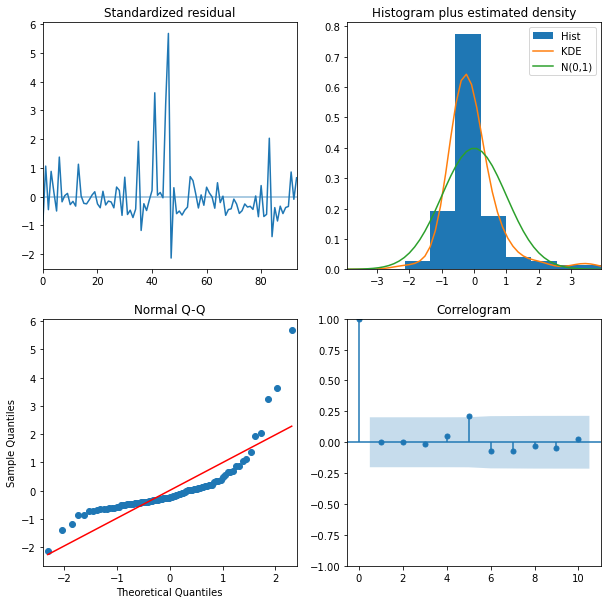

In [66]:
# Checking diagnostic plots
import statsmodels.api as sm
model_fit.plot_diagnostics(figsize=(10, 10))
plt.show()

In [67]:
import plotly.graph_objs as go
fig= go.Figure(data=
               [go.Scatter(x= test["Date"],
                           y= test["Weekly_Sales"],
                           name= "original", 
                           showlegend=True,
                           marker=dict(color="blue"))])
fig.add_trace(
    go.Scatter(x= test["Date"],
               y=forecast,
               name= "fitted values",
               showlegend= True, 
               marker=dict(color="red")))
fig.update_layout(
    title="Fitted values",
    xaxis_title="Dates",
    yaxis_title="Sales",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="#7f7f7f"
    ) )
fig.show()

Producing and Visualizing Forecasts

<AxesSubplot:xlabel='Date'>

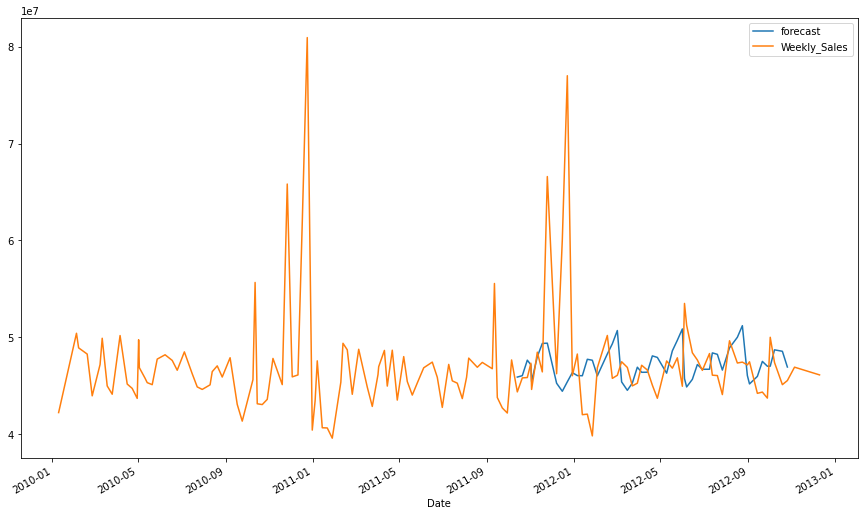

In [68]:
from pandas.tseries.offsets import DateOffset
future_dates=[data1.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data1.columns)

future_datest_df.tail()

future_df=pd.concat([data1,future_datest_df])

future_df['forecast'] = results.predict(start =88 ,end =140 , dynamic= True)
future_df['forecast'].plot(legend=True)
data1['Weekly_Sales'].plot(legend=True) 

<AxesSubplot:>

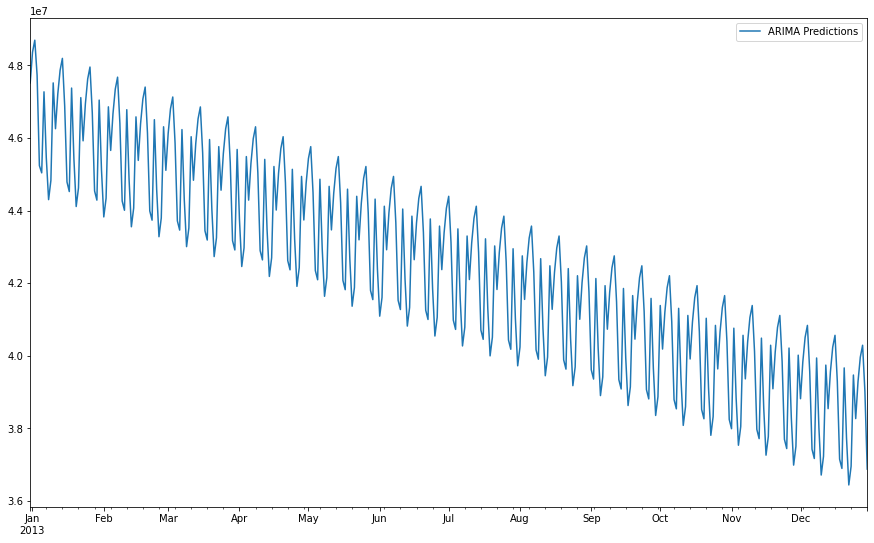

In [69]:
index_future_dates=pd.date_range(start='2012-12-31',end='2013-12-30')
#print(index_future_dates)
pred=results.predict(start=len(data1),end=len(data1)+364).rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
pred.plot(legend=True)
#print(pred)

Prophet model

Applying prophet model 


In [70]:
from fbprophet import Prophet

In [71]:
#To put seasonality as weekly and monthly
from fbprophet import Prophet
# Creating a train dataset
train_prophet = data1.copy()
train_prophet.reset_index(level=0, inplace=True)
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Date': 'ds',
                                'Weekly_Sales': 'y'})


In [72]:
prophet_1 = Prophet(interval_width = 0.95) 
prophet_1.fit(train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


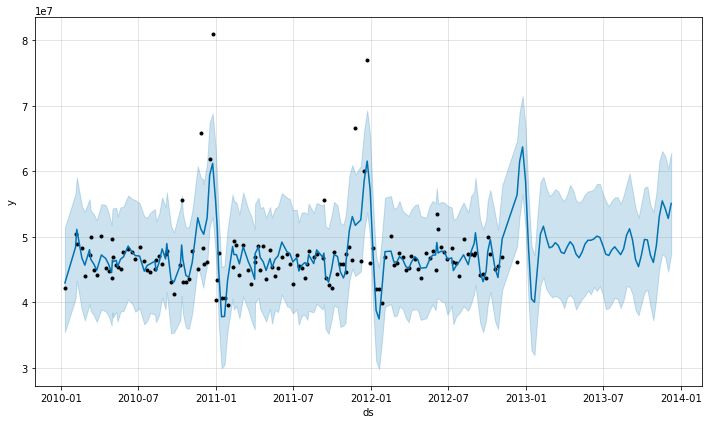

In [73]:
future_dates = prophet_1.make_future_dataframe(periods = 52, freq='W')
forecast = prophet_1.predict(future_dates)

prophet_1.plot(forecast);

The model was able to capture the seasonality.

In [74]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
190 2013-11-10  5.310856e+07  4.516480e+07  6.152161e+07
191 2013-11-17  5.548898e+07  4.740510e+07  6.308944e+07
192 2013-11-24  5.431260e+07  4.692469e+07  6.231348e+07
193 2013-12-01  5.281591e+07  4.468744e+07  6.041430e+07
194 2013-12-08  5.510046e+07  4.741312e+07  6.280771e+07

In [75]:
# Checking the RMSE of Prophet model
metric_prophet_1 = forecast.set_index('ds')[['yhat']].join(train_prophet.set_index('ds').y).reset_index()
metric_prophet_1.dropna(inplace=True)
rms_prophet_1 = mean_squared_error(metric_prophet_1.y, metric_prophet_1.yhat)
rms_prophet_1

16146195692276.367

RMSE, in this case, is too large and we need to do something about it.ARIMA is better model.

Model 3 XGBoost

In [76]:
dataset_xg.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  DayOfTheWeek  Day  
0  211.096358         8.106  2010      5    17             6    2  
1  211.242170         8.106  2010     12    48             3    2  
2  211.289143         8.106  2010      2     7             4   19  
3  211.319643         8.106  2010      2     8             4   26  
4  211.350143         8.106  2010      5    18             0    3

In [77]:
split_date = '2012-06-01'
data_train = dataset_xg.loc[dataset_xg.Date <= split_date].copy()
data_test = dataset_xg.loc[dataset_xg.Date > split_date].copy()

In [78]:
from sklearn.model_selection import train_test_split
X_train, y_train = data_train[['Store', 'Month', 'Year', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 
           'CPI', 'Unemployment']], data_train['Weekly_Sales']

X_test, y_test = data_test[['Store','Month', 'Year', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 
           'CPI', 'Unemployment']], data_test['Weekly_Sales']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5400, 8), (5400,), (1035, 8), (1035,))

In [79]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

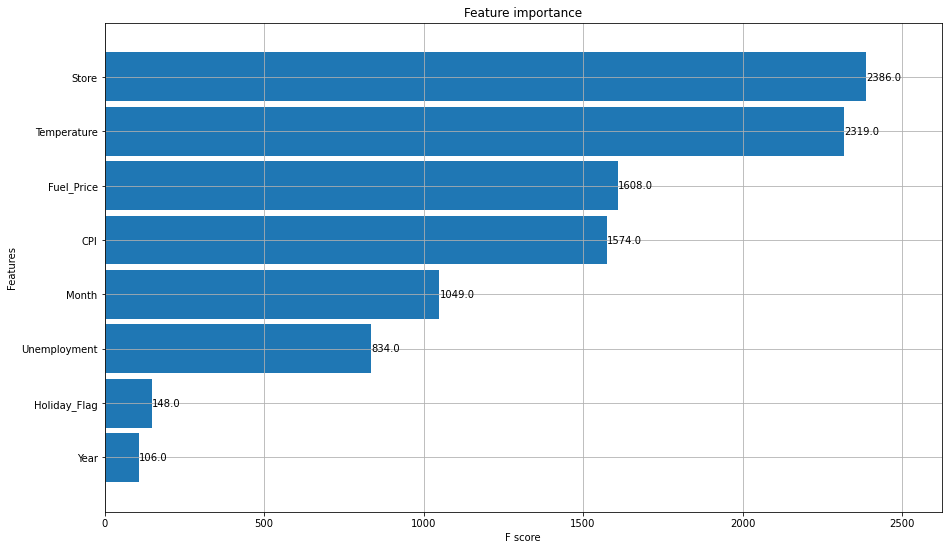

In [80]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(reg, height=0.9)

Forecast on Test Set XGB Regressor

In [81]:
data_test['Weekly_Sales_pred'] = reg.predict(X_test)
dataset_all = pd.concat([data_test, data_train], sort=True)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=data_test['Weekly_Sales'],
                   y_pred=data_test['Weekly_Sales_pred'])

10521704659.934591

In [83]:
mean_absolute_error(y_true=data_test['Weekly_Sales'],
                   y_pred=data_test['Weekly_Sales_pred'])

74016.48694414251

In [84]:
from statsmodels.tools.eval_measures import rmse
import datetime 
error=rmse(data_test['Weekly_Sales'],
                   data_test['Weekly_Sales_pred'])
error

102575.3608813276

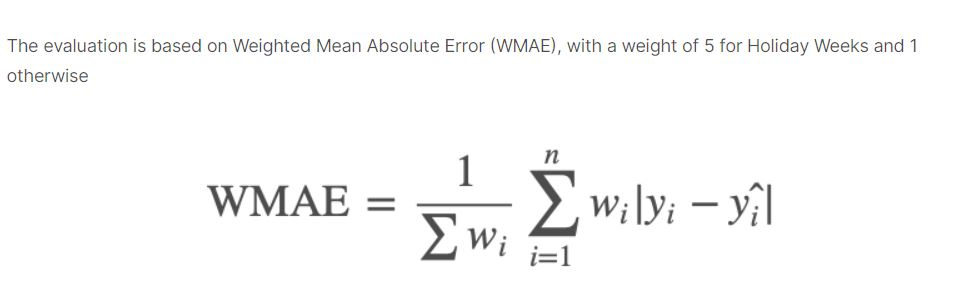

In [85]:
def wmae(dataset_xg, real, predicted):
    weights = dataset_xg.Holiday_Flag.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [86]:
holiday_week_teste = data_train.Holiday_Flag.apply(lambda x: True if x else False)
wmae_xgb = wmae(data_test,data_test.Weekly_Sales, data_test.Weekly_Sales_pred)
wmae_xgb

75426.06

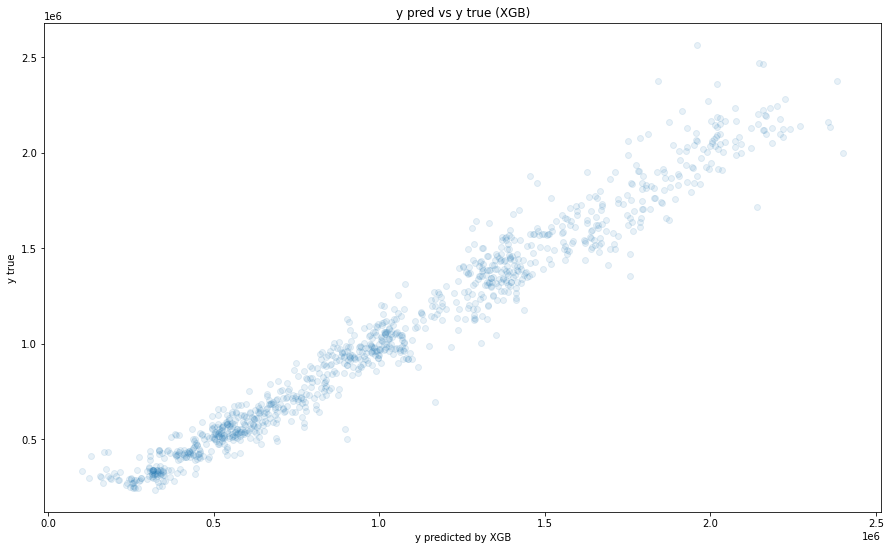

In [90]:
plt.scatter(data_test['Weekly_Sales_pred'], data_test['Weekly_Sales'], alpha = 0.1)
plt.xlabel("y predicted by XGB")
plt.ylabel("y true")
plt.title("y pred vs y true (XGB)")
plt.show()